### Problem Solving

### Sentiment Analysis of News Headlines for Stock Market Movement

Database : https://www.kaggle.com/datasets/siddharthtyagi/news-headlines-dataset-for-stock-sentiment-analyze?resource=download

In [26]:
pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 165.2 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/301.2 kB 187.9 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/301.2 kB 328.6 kB/s eta 0:00:01
   --------------------- ---------------- 174.1/301.2 kB 700.2 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 979.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [32]:
df = pd.read_csv("Data.csv", encoding="ISO-8859-1")


In [34]:
print(data.columns)


Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')


In [36]:
df = df.dropna()

In [42]:
headline_cols = [col for col in df.columns if col.startswith("Top")]
df['combined_text'] = df[headline_cols].apply(lambda x: ' '.join(x.astype(str)), axis=1)


In [44]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['combined_text'].apply(clean_text)


In [46]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] > 0.05:
        return "Positive"
    elif score['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['clean_text'].apply(get_sentiment)

In [60]:
from collections import Counter

# Convert combined text into list of words
words_list = all_words.split()

# Count word frequencies
word_freq = Counter(words_list)

# Get Top 20 Most Common Keywords (as array of words)
common_keywords = [word for word, freq in word_freq.most_common(50)]

print("Top 20 Common Keywords:")
print(common_keywords)


Top 20 Common Keywords:
['u', 'say', 'new', 'world', 'year', 'government', 'police', 'china', 'people', 'country', 'israel', 'war', 'attack', 'state', 'one', 'first', 'russia', 'woman', 'uk', 'time', 'right', 'leader', 'review', 'president', 'day', 'killed', 'report', 'child', 'death', 'man', 'may', 'get', 'call', 'news', 'law', 'iran', 'minister', 'back', 'court', 'israeli', 'two', 'city', 'north', 'korea', 'force', 'said', 'bank', 'russian', 'protest', 'ban']



Sentiment Distribution:
sentiment
Negative    3109
Positive     954
Neutral       35
Name: count, dtype: int64


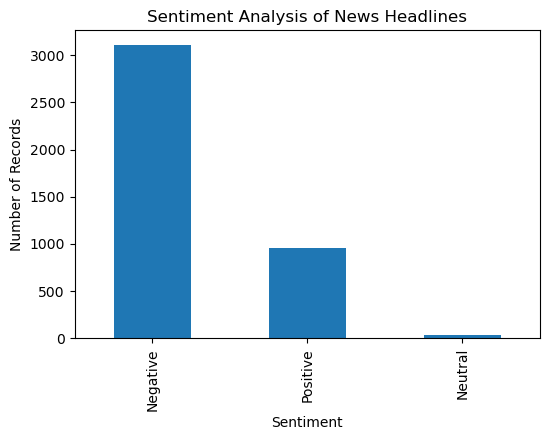

         Date                                      combined_text sentiment
0  2000-01-03  A 'hindrance to operations': extracts from the...  Negative
1  2000-01-04  Scorecard The best lake scene Leader: German s...  Negative
2  2000-01-05  Coventry caught on counter by Flo United's riv...  Positive
3  2000-01-06  Pilgrim knows how to progress Thatcher facing ...  Negative
4  2000-01-07  Hitches and Horlocks Beckham off but United su...  Negative


In [50]:
sentiment_counts = df['sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar')
plt.title("Sentiment Analysis of News Headlines")
plt.xlabel("Sentiment")
plt.ylabel("Number of Records")
plt.show()

# Show sample results
print(df[['Date', 'combined_text', 'sentiment']].head(5))